In [6]:
import pandas as pd

df = pd.read_csv('/home/nachi/git/personal/files/boxscores/appended_boxscores.tsv',sep='\t')
df_ad = pd.read_csv('/home/nachi/git/personal/files/boxscores_advanced/appended_boxscores_advanced.tsv',sep='\t')
team_v = pd.read_csv('/home/nachi/git/personal/files/team_vs_player/appended_team_vs_player.tsv',sep='\t')
team_v = team_v.drop_duplicates()
team_v = team_v[team_v['GROUP_SET']!='GROUP_SET']

print df.columns
game_sum = df.groupby(['GAME_ID','TEAM_ID']).sum().reset_index()
players = df['PLAYER_ID'].unique()

Index([u'GAME_ID', u'TEAM_ID', u'TEAM_ABBREVIATION', u'TEAM_CITY',
       u'PLAYER_ID', u'PLAYER_NAME', u'START_POSITION', u'COMMENT', u'MIN',
       u'FGM', u'FGA', u'FG_PCT', u'FG3M', u'FG3A', u'FG3_PCT', u'FTM', u'FTA',
       u'FT_PCT', u'OREB', u'DREB', u'REB', u'AST', u'STL', u'BLK', u'TO',
       u'PF', u'PTS', u'PLUS_MINUS'],
      dtype='object')


In [10]:
print game_sum.columns

Index([u'GAME_ID', u'TEAM_ID', u'PLAYER_ID', u'FGM', u'FGA', u'FG_PCT',
       u'FG3M', u'FG3A', u'FG3_PCT', u'FTM', u'FTA', u'FT_PCT', u'OREB',
       u'DREB', u'REB', u'AST', u'STL', u'BLK', u'TO', u'PF', u'PTS',
       u'PLUS_MINUS'],
      dtype='object')


Index([u'GROUP_SET', u'TEAM_ID', u'TEAM_ABBREVIATION', u'TEAM_NAME',
       u'VS_PLAYER_ID', u'VS_PLAYER_NAME', u'COURT_STATUS', u'GROUP_VALUE',
       u'FGM', u'FGA', u'FG_PCT', u'CFID', u'CFPARAMS'],
      dtype='object')
['Restricted Area' 'In The Paint (Non-RA)' 'Mid-Range' 'Left Corner 3'
 'Right Corner 3' 'Above the Break 3' 'Backcourt']
    TEAM_ABBREVIATION     GROUP_VALUE       FGM       FGA    FG_PCT
195               TOR  Right Corner 3  0.332143  1.100000  0.301948
97                LAL  Right Corner 3  0.360000  1.090000  0.330275
188               SAS  Right Corner 3  0.480000  1.446667  0.331797
118               MIL  Right Corner 3  0.376923  1.119231  0.336770
132               NOP  Right Corner 3  0.352000  1.040000  0.338462


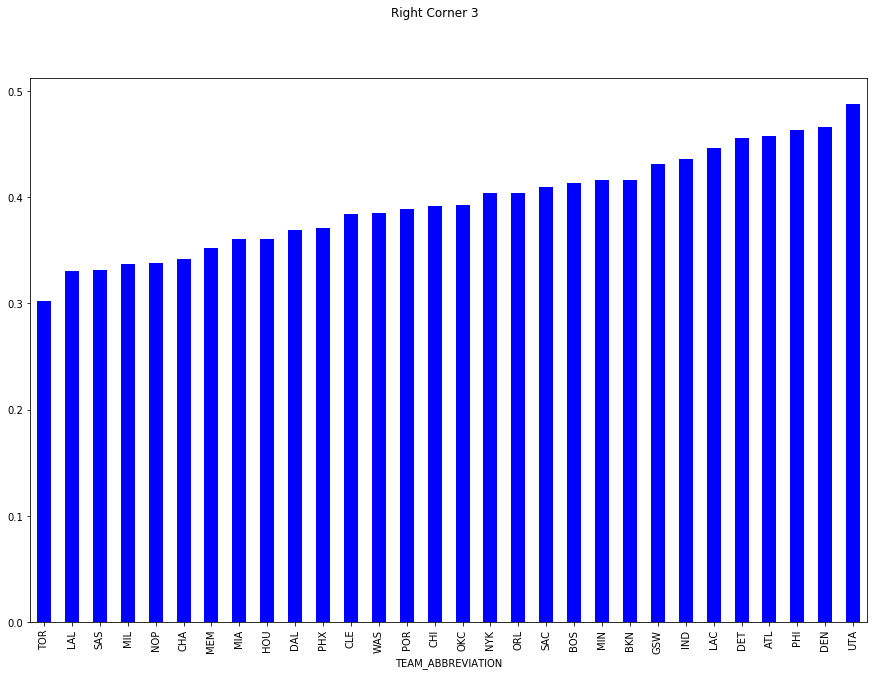

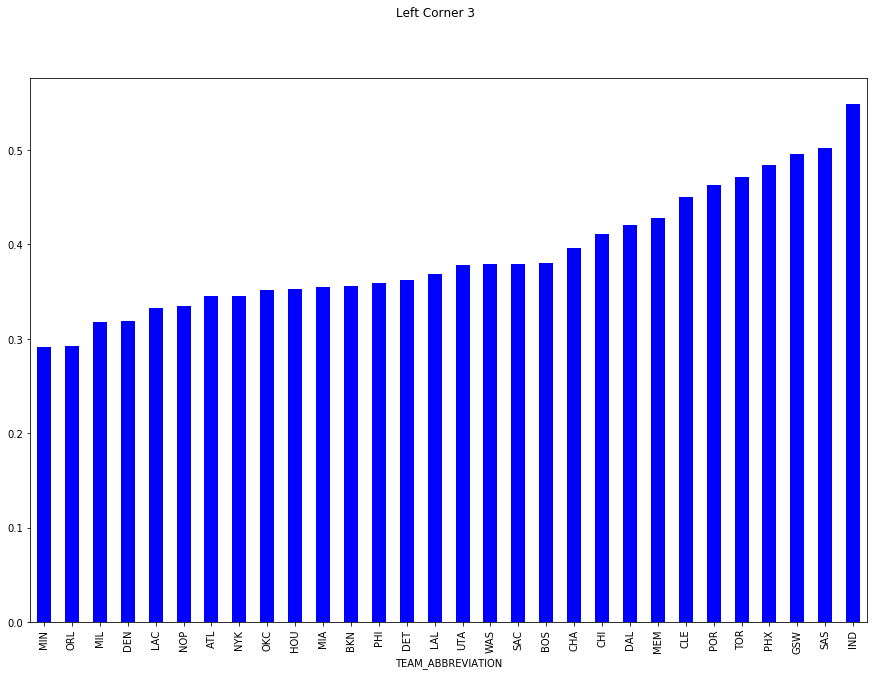

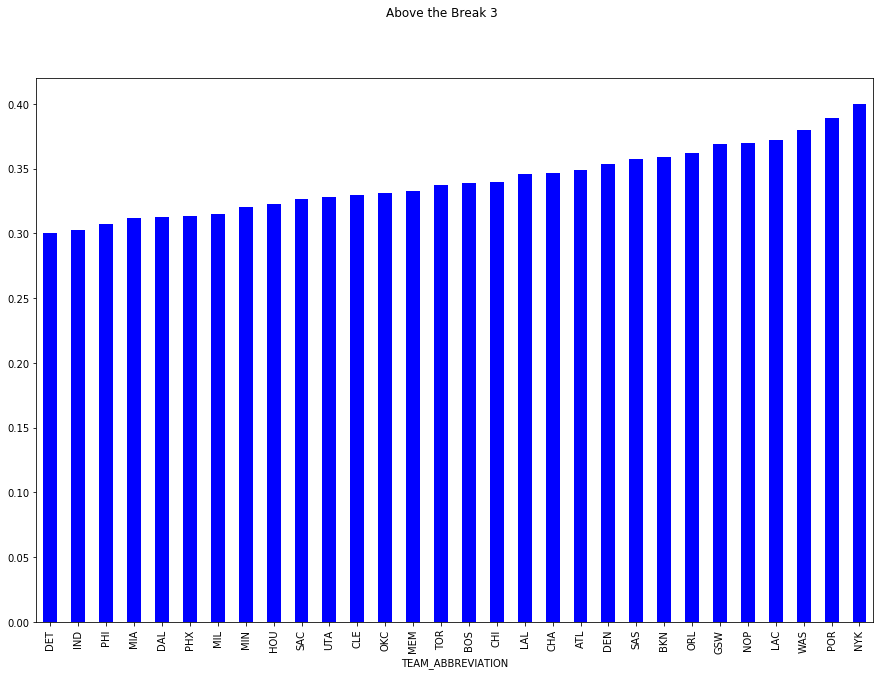

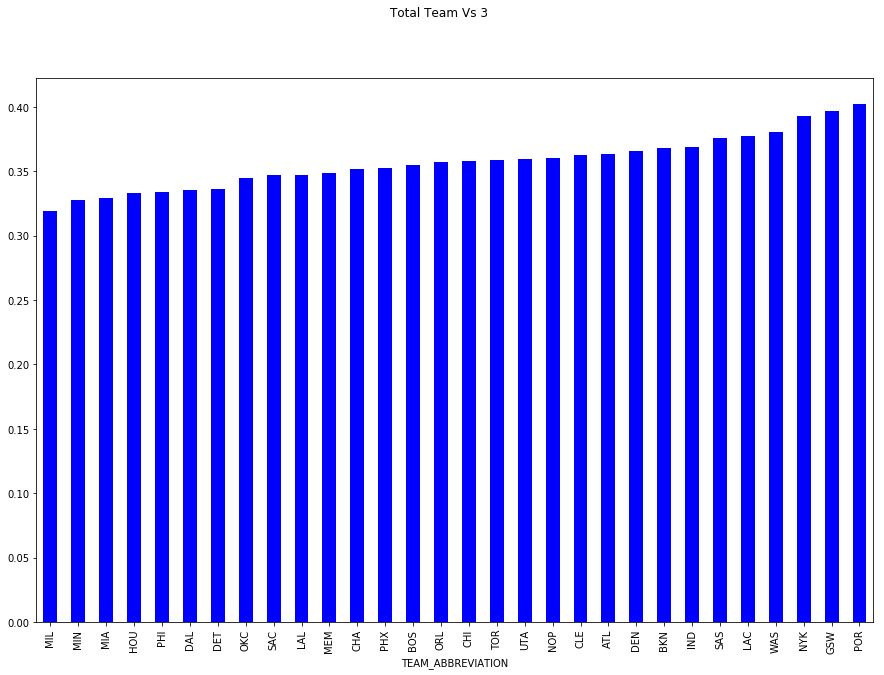

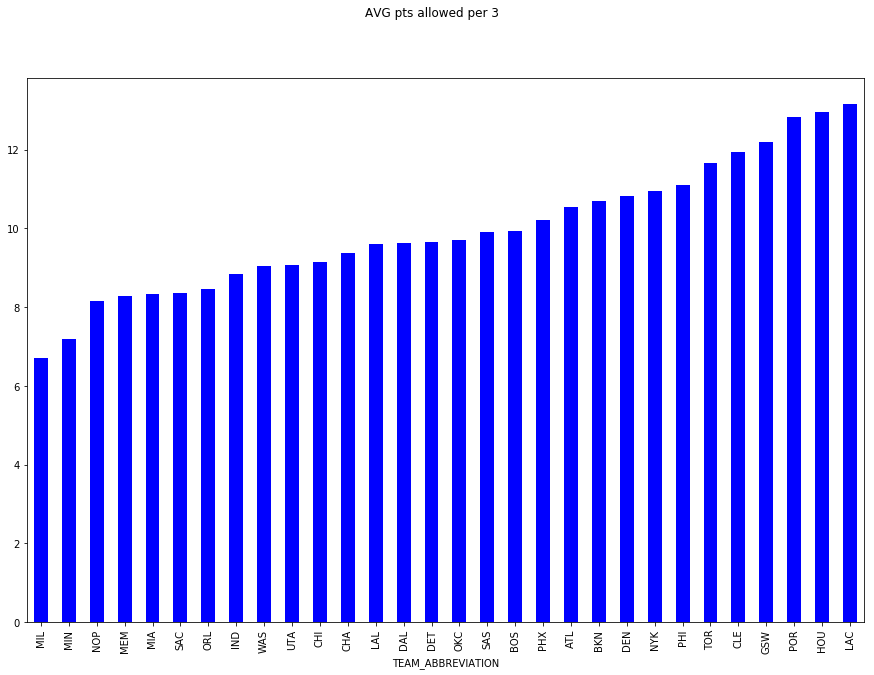

In [23]:
from matplotlib import pyplot as plt
team_v.dtypes
print team_v.columns
print team_v.GROUP_VALUE.unique()
team_v[['FGM','FGA','FG_PCT']]=team_v[['FGM','FGA','FG_PCT']].astype(float)
team_v_group = team_v.groupby(['TEAM_ABBREVIATION','GROUP_VALUE']).mean()[['FGM','FGA']].reset_index()
team_v_group['FG_PCT'] = team_v_group['FGM']/team_v_group['FGA']
print team_v_group[team_v_group['GROUP_VALUE']=='Right Corner 3'].sort_values('FG_PCT',ascending=True).head()
team_v_group.set_index('TEAM_ABBREVIATION',inplace=True)
team_v_group=team_v_group.sort_values('FG_PCT',ascending=True)

team_v_group[team_v_group['GROUP_VALUE']=='Right Corner 3']['FG_PCT'].plot(kind='bar',figsize=(15,10))
plt.suptitle('Right Corner 3')
plt.show()
team_v_group[team_v_group['GROUP_VALUE']=='Left Corner 3']['FG_PCT'].plot(kind='bar',figsize=(15,10))
plt.suptitle('Left Corner 3')
plt.show()
team_v_group[team_v_group['GROUP_VALUE']=='Above the Break 3']['FG_PCT'].plot(kind='bar',figsize=(15,10))
plt.suptitle('Above the Break 3')
plt.show()

right = team_v_group[team_v_group['GROUP_VALUE']=='Right Corner 3']
left = team_v_group[team_v_group['GROUP_VALUE']=='Left Corner 3']
center = team_v_group[team_v_group['GROUP_VALUE']=='Above the Break 3']

m = right.merge(left,how='inner',left_index = True ,right_index=True)
m = m.merge(center,how='inner',left_index = True ,right_index=True)
m['sum_fgm'] = m['FGM_x']+m['FGM_y']+m['FGM']
m['sum_fga'] = m['FGA_x']+m['FGA_y']+m['FGA']
m['total_fg_pct'] =m['sum_fgm']/ m['sum_fga']
m=m.sort_values('total_fg_pct',ascending=True)
m['total_fg_pct'].plot(kind='bar',figsize=(15,10))
plt.suptitle('Total Team Vs 3 ')
plt.show()

m['AVG_pts_allowed_per_3'] = m['total_fg_pct'] * m['sum_fga'] * 3
m=m.sort_values('AVG_pts_allowed_per_3',ascending=True)
m['AVG_pts_allowed_per_3'].plot(kind='bar',figsize=(15,10))
plt.suptitle('AVG pts allowed per 3')
plt.show()

                              OLS Regression Results                             
Dep. Variable:     AVG_pts_allowed_per_3   R-squared:                       0.270
Model:                               OLS   Adj. R-squared:                  0.244
Method:                    Least Squares   F-statistic:                     10.35
Date:                   Mon, 23 Oct 2017   Prob (F-statistic):            0.00325
Time:                           09:26:18   Log-Likelihood:                -52.379
No. Observations:                     30   AIC:                             108.8
Df Residuals:                         28   BIC:                             111.6
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4

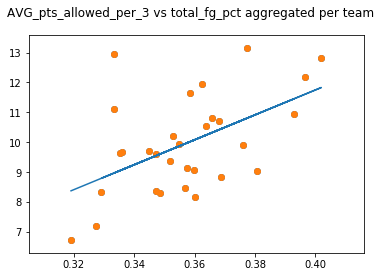

In [37]:


from pandas.stats.api import ols
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np


# res = ols(y=m['AVG_pts_allowed_per_3'], x=m['total_fg_pct'])
# print res

Y=m['AVG_pts_allowed_per_3']
X = m['total_fg_pct']
plt.scatter(X,Y)


results = sm.OLS(Y,sm.add_constant(X)).fit()

print results.summary()

plt.scatter(X,Y)
plt.plot(X, X*results.params[1] + results.params[0])
plt.suptitle('AVG_pts_allowed_per_3 vs total_fg_pct aggregated per team')
plt.show()

In [54]:
print team_v.columns
z = team_v.groupby(['TEAM_ABBREVIATION','VS_PLAYER_ID','GROUP_VALUE']).sum().reset_index()
z_filter_3 = z[z['GROUP_VALUE'].isin(['Above the Break 3','Left Corner 3','Right Corner 3'])].groupby(['TEAM_ABBREVIATION','VS_PLAYER_ID']).sum().reset_index()
# z_filter_3['avg_pts_allowed_from_player'] = (z_filter_3['']/z_filter_3[''])*3

team_v


Index([u'GROUP_SET', u'TEAM_ID', u'TEAM_ABBREVIATION', u'TEAM_NAME',
       u'VS_PLAYER_ID', u'VS_PLAYER_NAME', u'COURT_STATUS', u'GROUP_VALUE',
       u'FGM', u'FGA', u'FG_PCT', u'CFID', u'CFPARAMS'],
      dtype='object')


GROUP_SET     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME  \
0     Vs. Player  1610612749               MIL        Milwaukee Bucks   
1     Vs. Player  1610612749               MIL        Milwaukee Bucks   
2     Vs. Player  1610612749               MIL        Milwaukee Bucks   
3     Vs. Player  1610612749               MIL        Milwaukee Bucks   
4     Vs. Player  1610612749               MIL        Milwaukee Bucks   
5     Vs. Player  1610612749               MIL        Milwaukee Bucks   
6     Vs. Player  1610612749               MIL        Milwaukee Bucks   
9     Vs. Player  1610612749               MIL        Milwaukee Bucks   
10    Vs. Player  1610612749               MIL        Milwaukee Bucks   
11    Vs. Player  1610612749               MIL        Milwaukee Bucks   
12    Vs. Player  1610612749               MIL        Milwaukee Bucks   
13    Vs. Player  1610612749               MIL        Milwaukee Bucks   
14    Vs. Player  1610612749               MIL        Milwaukee Bucks   
17    Vs. Player  1610612749               MIL        Milwaukee Bucks   
18    Vs. Player  1610612749               MIL        Milwaukee Bucks   
19    Vs. Player  1610612749               MIL        Milwaukee Bucks   
20    Vs. Player  1610612749               MIL        Milwaukee Bucks   
21    Vs. Player  1610612749               MIL        Milwaukee Bucks   
22    Vs. Player  1610612749               MIL        Milwaukee Bucks   
24    Vs. Player  1610612744               GSW  Golden State Warriors   
25    Vs. Player  1610612744               GSW  Golden State Warriors   
26    Vs. Player  1610612744               GSW  Golden State Warriors   
27    Vs. Player  1610612744               GSW  Golden State Warriors   
28    Vs. Player  1610612744               GSW  Golden State Warriors   
29    Vs. Player  1610612744               GSW  Golden State Warriors   
30    Vs. Player  1610612744               GSW  Golden State Warriors   
32    Vs. Player  1610612744               GSW  Golden State Warriors   
33    Vs. Player  1610612744               GSW  Golden State Warriors   
34    Vs. Player  1610612744               GSW  Golden State Warriors   
35    Vs. Player  1610612744               GSW  Golden State Warriors   
...          ...         ...               ...                    ...   
8122  Vs. Player  1610612754               IND         Indiana Pacers   
8123  Vs. Player  1610612754               IND         Indiana Pacers   
8124  Vs. Player  1610612754               IND         Indiana Pacers   
8125  Vs. Player  1610612754               IND         Indiana Pacers   
8126  Vs. Player  1610612740               NOP   New Orleans Pelicans   
8127  Vs. Player  1610612740               NOP   New Orleans Pelicans   
8128  Vs. Player  1610612740               NOP   New Orleans Pelicans   
8129  Vs. Player  1610612740               NOP   New Orleans Pelicans   
8130  Vs. Player  1610612740               NOP   New Orleans Pelicans   
8131  Vs. Player  1610612740               NOP   New Orleans Pelicans   
8132  Vs. Player  1610612740               NOP   New Orleans Pelicans   
8133  Vs. Player  1610612740               NOP   New Orleans Pelicans   
8134  Vs. Player  1610612740               NOP   New Orleans Pelicans   
8135  Vs. Player  1610612740               NOP   New Orleans Pelicans   
8136  Vs. Player  1610612740               NOP   New Orleans Pelicans   
8137  Vs. Player  1610612740               NOP   New Orleans Pelicans   
8138  Vs. Player  1610612740               NOP   New Orleans Pelicans   
8140  Vs. Player  1610612740               NOP   New Orleans Pelicans   
8141  Vs. Player  1610612740               NOP   New Orleans Pelicans   
8142  Vs. Player  1610612740               NOP   New Orleans Pelicans   
8143  Vs. Player  1610612740               NOP   New Orleans Pelicans   
8144  Vs. Player  1610612740               NOP   New Orleans Pelicans   
8145  Vs. Player  1610612740               NOP   New Orleans Peli